#Prosty Ambilight
Projekt przedstawia implementację symulatora efektu ambilight, znanego z nowoczesnych systemów wyświetlania obrazu. Głównym celem algorytmu jest analiza pikseli znajdujących się na skrajnych krawędziach grafiki wejściowej i wygenerowanie na ich podstawie uśrednionego, gradientowanego koloru tła. Algorytm został przetestowany na różnych bibliotekach kolorystycznych

Saving test_image.jpeg to test_image (1).jpeg


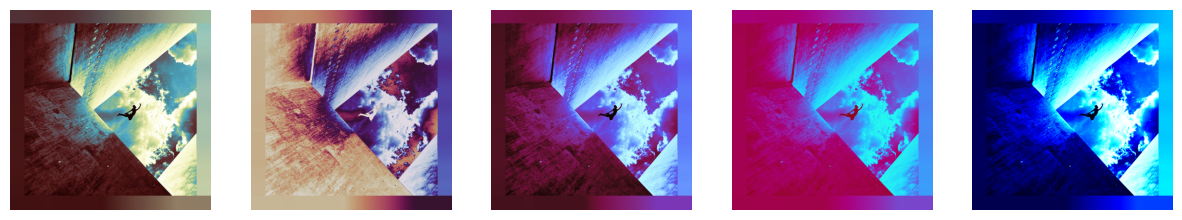

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

upl = files.upload()
sciezka = list(upl.keys())[0]
img = cv2.imread(sciezka)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ramka = 50
liczba_wierszy, liczba_kolumn, _ = img.shape

lewo = np.median(img[:,:ramka,:],axis=1)
prawo = np.median(img[:,-ramka:,:],axis=1)
gora = np.median(img[:ramka,:,:],axis=0)
dol = np.median(img[-ramka:,:,:],axis=0)

x = np.linspace(0,1,ramka)[np.newaxis,:,np.newaxis]
y = np.linspace(0,1,ramka)[:,np.newaxis,np.newaxis]

lewo_ramka = (lewo[:,np.newaxis,:] * (1-x) + lewo[:,np.newaxis,:] * x).astype(np.uint8)
prawo_ramka = (prawo[:,np.newaxis,:] * (1-x) + prawo[:,np.newaxis,:] * x).astype(np.uint8)
gora_ramka = (gora[np.newaxis,:,:] * (1-y) + gora[np.newaxis,:,:] * y).astype(np.uint8)
dol_ramka = (dol[np.newaxis,:,:] * (1-y) + dol[np.newaxis,:,:] * y).astype(np.uint8)

szerokosc = liczba_kolumn + 2*ramka
gora_ramka = cv2.resize(gora_ramka,(szerokosc,ramka))
dol_ramka = cv2.resize(dol_ramka,(szerokosc,ramka))

lewo_ramka = cv2.blur(lewo_ramka,(500,500))
prawo_ramka = cv2.blur(prawo_ramka,(500,500))
gora_ramka = cv2.blur(gora_ramka,(500,500))
dol_ramka = cv2.blur(dol_ramka,(500,500))

obramowanie = np.hstack([lewo_ramka, img, prawo_ramka])
ambilight = np.vstack([gora_ramka, obramowanie, dol_ramka])

mapy_kolorow = [None,'twilight','magma','plasma','hot']
fig, axes = plt.subplots(1, len(mapy_kolorow), figsize=(15,5))

for ax, mapa in zip(axes, mapy_kolorow):
  if mapa is None:
    image = ambilight
  else:
    img_gray = cv2.cvtColor(ambilight, cv2.COLOR_RGB2GRAY)
    image = cv2.applyColorMap(img_gray, getattr(cv2, f'COLORMAP_{mapa.upper()}'))

  ax.imshow(image)
  ax.axis("off")
plt.show()

Saving test_image_grayscale.jpeg to test_image_grayscale (1).jpeg


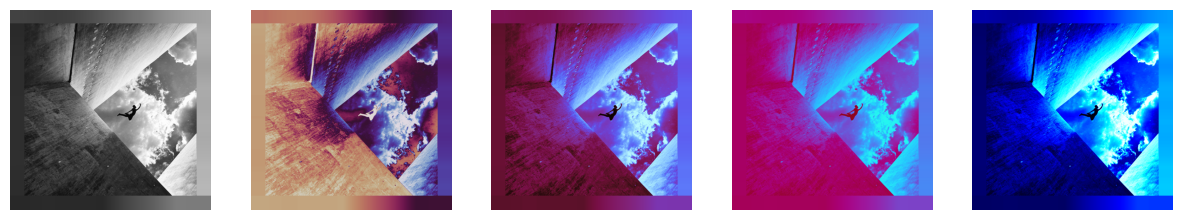

In [ ]:
upl = files.upload()
sciezka = list(upl.keys())[0]
img = cv2.imread(sciezka)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ramka = 50
liczba_wierszy, liczba_kolumn, _ = img.shape

lewo = np.median(img[:,:ramka,:],axis=1)
prawo = np.median(img[:,-ramka:,:],axis=1)
gora = np.median(img[:ramka,:,:],axis=0)
dol = np.median(img[-ramka:,:,:],axis=0)

x = np.linspace(0,1,ramka)[np.newaxis,:,np.newaxis]
y = np.linspace(0,1,ramka)[:,np.newaxis,np.newaxis]

lewo_ramka = (lewo[:,np.newaxis,:] * (1-x) + lewo[:,np.newaxis,:] * x).astype(np.uint8)
prawo_ramka = (prawo[:,np.newaxis,:] * (1-x) + prawo[:,np.newaxis,:] * x).astype(np.uint8)
gora_ramka = (gora[np.newaxis,:,:] * (1-y) + gora[np.newaxis,:,:] * y).astype(np.uint8)
dol_ramka = (dol[np.newaxis,:,:] * (1-y) + dol[np.newaxis,:,:] * y).astype(np.uint8)

szerokosc = liczba_kolumn + 2*ramka
gora_ramka = cv2.resize(gora_ramka,(szerokosc,ramka))
dol_ramka = cv2.resize(dol_ramka,(szerokosc,ramka))

lewo_ramka = cv2.blur(lewo_ramka,(500,500))
prawo_ramka = cv2.blur(prawo_ramka,(500,500))
gora_ramka = cv2.blur(gora_ramka,(500,500))
dol_ramka = cv2.blur(dol_ramka,(500,500))

obramowanie = np.hstack([lewo_ramka, img, prawo_ramka])
ambilight = np.vstack([gora_ramka, obramowanie, dol_ramka])

mapy_kolorow = [None,'twilight','magma','plasma','hot']
fig, axes = plt.subplots(1, len(mapy_kolorow), figsize=(15,5))

for ax, mapa in zip(axes, mapy_kolorow):
  if mapa is None:
    image = ambilight
  else:
    img_gray = cv2.cvtColor(ambilight, cv2.COLOR_RGB2GRAY)
    image = cv2.applyColorMap(img_gray, getattr(cv2, f'COLORMAP_{mapa.upper()}'))

  ax.imshow(image)
  ax.axis("off")
plt.show()

Stworzony skrypt z powodzeniem symuluje fundamentalne działanie systemu podświetlania tła. Poprzez zastosowanie operacji macierzowych na danych reprezentujących piksele obrazu, udało się w pełni zautomatyzować proces doboru koloru otoczenia do specyfiki krawędzi badanej grafiki.